Load in the weather, smartmeter and gasmeter data as 3 seperate dataframes. 
Goal is to combine them into one dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df =pd.read_csv("/datc/opschaler/smartmeter_data/P01S01W0373.csv",header=0,delimiter=";",parse_dates=['Timestamp', 'gasTimestamp'])

# Split the smartmeter and gasmeter data
smart = df.iloc[:,:7]
gas = df.iloc[:, 7:]

#Read in weather data
weather_path = "//datc//opschaler//weather_data//20170101to20180101.txt"
weather_column_names = ['STN','YYYYMMDD','HH','DD','FH','FF','FX','T','T10','TD','SQ','Q','DR','RH','P','VV','N','U','WW','IX','M','R','S','O','Y']

weather = pd.read_csv(weather_path, delimiter=',', comment='#', names=weather_column_names, parse_dates=['YYYYMMDD', 'HH'])
weather['T'] = weather['T']*0.01 # Convert temperature to celcius instead of 0.1 celcius
weather['HH'] = weather['HH']+':00:00'
weather['HH'] = weather['HH'].str.strip() # removes the blank spaces infront of the strings
weather['HH'] = weather['HH'].str.replace('24:00:00', '23:59:59') # KNMI uses 24 for 00 hours.... to have to convert this for to_datetime to be able to work
weather.loc[:,'datetime'] = pd.to_datetime(weather['YYYYMMDD'].astype(str)+' '+weather['HH'].astype(str)) #create datetime column

In [2]:
"""
Problem: How to merge 3 frames with 3 different datetime's?
The format is the same, but they don't have ''exact'' matches with each other. 
i.e. 

"""

# Change all datetime columns to the same column name
smart = smart.rename(index=str, columns={"Timestamp":"datetime"})
gas = gas.rename(index=str, columns={"gasTimestamp":"datetime"})

df = pd.merge(left=smart, right=gas, how='outer', on='datetime')
df = pd.merge(left=df, right=weather, how='outer', on='datetime')

"""
Only keep relevant information for scrumwise sprint 2.
-> smartmeter energy usage data
-> gasmeter gas usage data
-> outside temperature
-> global radiation
"""

df = df[['datetime', 'eMeter', 'eMeterLow', 'ePower', 'gasMeter', 'T', 'Q']]
#df = df[['datetime', 'eMeter', 'eMeterLow', 'ePower', 'gasMeter']]
df.head()

,datetime,eMeter,eMeterLow,ePower,gasMeter,T,Q
0,2017-03-07 18:14:28,3717.472,3883.382,376.0,NaN,NaN,NaN
1,2017-03-07 18:14:38,3717.473,3883.382,381.0,NaN,NaN,NaN
2,2017-03-07 18:14:48,3717.474,3883.382,378.0,NaN,NaN,NaN
3,2017-03-07 18:14:59,3717.475,3883.382,376.0,NaN,NaN,NaN
4,2017-03-07 18:15:09,3717.476,3883.382,380.0,NaN,NaN,NaN


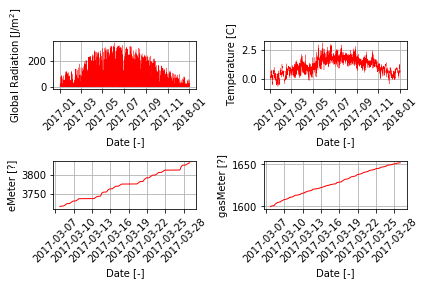

In [3]:

plt.subplot(2,2,1)
plt.plot(df.datetime, df['Q'], '-', color='r', linewidth=0.3)
plt.xlabel('Date [-]')
plt.ylabel('Global Radiation [J/m$^2$]')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

plt.subplot(2,2,2)
plt.plot(df.datetime, df['T'], '-', color='r', linewidth=0.3)
plt.xlabel('Date [-]')
plt.ylabel('Temperature [C]')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

plt.subplot(2,2,3)
plt.plot(df.datetime, df['eMeter'], '-', color='r', linewidth=1)
plt.xlabel('Date [-]')
plt.ylabel('eMeter [?]')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

plt.subplot(2,2,4)
plt.plot(df.datetime, df['gasMeter'], '-', color='r', linewidth=1)
plt.xlabel('Date [-]')
plt.ylabel('gasMeter [?]')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

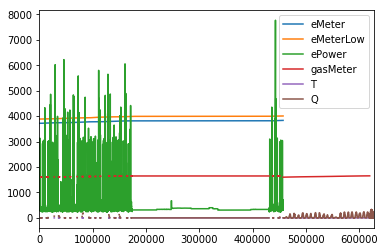

In [4]:
df.plot()

In [5]:
#_ = pd.plotting.scatter_matrix(df)
df.shape

(627617, 7)

In [11]:
df.to_csv('//datc//opschaler//output//test.csv', sep='\t', index=False)

In [ ]:
print('test')